<a href="https://colab.research.google.com/github/byunmj24/MyStudy/blob/master/practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dau = pd.read_csv('dau.csv', engine='python')
user = pd.read_csv('user_info.csv', engine='python')

In [4]:
dau.info()
dau[:5]
user.info()
user[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170360 entries, 0 to 170359
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   log_date  170360 non-null  object
 1   app_name  170360 non-null  object
 2   user_id   170360 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49526 entries, 0 to 49525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   install_date  49526 non-null  object
 1   app_name      49526 non-null  object
 2   user_id       49526 non-null  int64 
 3   gender        49526 non-null  object
 4   generation    49526 non-null  int64 
 5   device_type   49526 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.3+ MB


,install_date,app_name,user_id,gender,generation,device_type
0,2019-04-15,game-01,1,M,40,iOS
1,2019-04-15,game-01,2,M,10,Android
2,2019-04-15,game-01,3,F,40,iOS
3,2019-04-15,game-01,4,M,10,Android
4,2019-04-15,game-01,5,M,40,iOS


In [6]:
DauUser = dau.merge(user, on=['user_id', 'app_name'])
DauUser.info()
DauUser[:5]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170398 entries, 0 to 170397
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   log_date      170398 non-null  object
 1   app_name      170398 non-null  object
 2   user_id       170398 non-null  int64 
 3   install_date  170398 non-null  object
 4   gender        170398 non-null  object
 5   generation    170398 non-null  int64 
 6   device_type   170398 non-null  object
dtypes: int64(2), object(5)
memory usage: 10.4+ MB


,log_date,app_name,user_id,install_date,gender,generation,device_type
0,2019-08-01,game-01,33754,2019-08-01,M,20,iOS
1,2019-08-02,game-01,33754,2019-08-01,M,20,iOS
2,2019-08-01,game-01,28598,2019-07-16,M,50,iOS
3,2019-08-04,game-01,28598,2019-07-16,M,50,iOS
4,2019-08-12,game-01,28598,2019-07-16,M,50,iOS


In [7]:
DauUser['log_date_M'] = DauUser['log_date'].str[:7]
DauUser[:5]

,log_date,app_name,user_id,install_date,gender,generation,device_type,log_date_M
0,2019-08-01,game-01,33754,2019-08-01,M,20,iOS,2019-08
1,2019-08-02,game-01,33754,2019-08-01,M,20,iOS,2019-08
2,2019-08-01,game-01,28598,2019-07-16,M,50,iOS,2019-08
3,2019-08-04,game-01,28598,2019-07-16,M,50,iOS,2019-08
4,2019-08-12,game-01,28598,2019-07-16,M,50,iOS,2019-08


In [8]:
pd.crosstab(DauUser['log_date_M'], DauUser['gender'])

gender,F,M
log_date_M,,
2019-08,47358,46849
2019-09,38041,38150


In [9]:
pd.crosstab(DauUser['log_date_M'], DauUser['generation'])

generation,10,20,30,40,50
log_date_M,,,,,
2019-08,18786,33682,28080,8830,4829
2019-09,15392,27241,22229,7494,3835


In [10]:
pd.crosstab(DauUser['log_date_M'], columns=[DauUser['gender'], DauUser['generation']])

gender         F                               M                          
generation    10     20     30    40    50    10     20     30    40    50
log_date_M                                                                
2019-08     9091  17192  14219  4599  2257  9695  16490  13861  4231  2572
2019-09     7316  13628  11460  3856  1781  8076  13613  10769  3638  2054

In [11]:
pd.crosstab(DauUser['log_date_M'], DauUser["device_type"])

device_type,Android,iOS
log_date_M,,
2019-08,46990,47217
2019-09,29659,46532


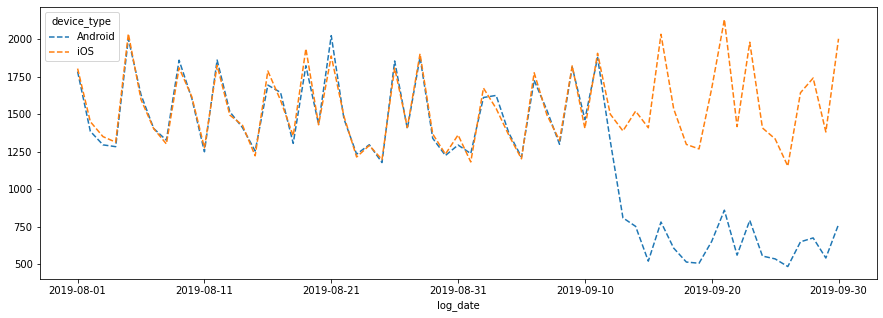

In [19]:
# 디바이스 유형별 접속일자의 시각화 - 라인 그래프
data = pd.crosstab(DauUser['log_date'], DauUser['device_type'])
graph = pd.DataFrame(data)
graph.plot.line(figsize=(15,5), style='--')